##  States and area codes 
#### Finding which states have only one area code

In [1]:
import pandas as pd

In [3]:
states = pd.read_csv('states.csv')
print(states.head())

   Area code          State State code
0        201     New Jersey         NJ
1        202  Washington,DC         DC
2        203    Connecticut         CT
3        205        Alabama         AL
4        206     Washington         WA


In [6]:
#reomving DC as it is not a state
new_state = states.drop(states.index[1])


In [8]:
new_state.drop_duplicates(subset = 'State',keep = False)

,Area code,State,State code
5,207,Maine,ME
6,208,Idaho,ID
41,302,Delaware,DE
43,304,West Virginia,WV
45,307,Wyoming,WY
72,401,Rhode Island,RI
76,406,Montana,MT
107,505,New Mexico,NM
139,603,New Hampshire,NH
140,605,South Dakota,SD


##  Zipcodes and States 
#### Display a bar chart that shows a sorted display of number zipcodes by states and territories 

In [41]:
zipcodes = pd.read_csv('zipcodes.states.gps.csv')
zipcodes.head()

,zip_code,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada
4,603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [50]:
zip_groups = zipcodes.groupby(by = ['state'], as_index = False)['zip_code'].count()

In [51]:
zip_sorted = zip_groups.sort_values(by=['zip_code'], ascending = False)
zip_sorted.head()

,state,zip_code
53,TX,2682
8,CA,2678
42,NY,2233
46,PA,2226
20,IL,1596


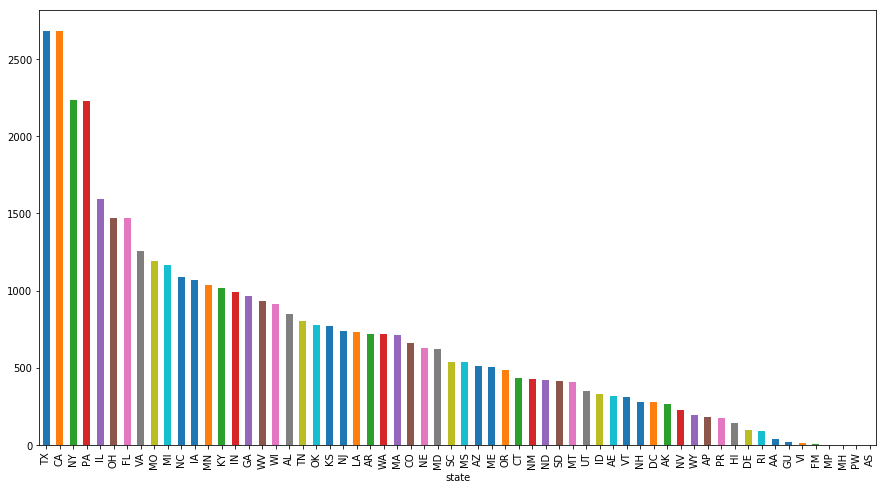

In [53]:
zip_sorted.plot(x = 'state', y = 'zip_code', kind = 'bar', figsize = (15,8), legend = False)

## dataset- Films
• load films2.csv
• There are two similar Subject categories: Western and Westerns. Using Pandas, merge the data from 'Westerns' into "Western'
• Use your knowledge of Panda DataFrames and Series to determine the Actor with the greatest number of movies in each Subject category. For some categories the max value is 1. Remove those entries.
• Display the category, Actor name and number of films (as an integer) where the number of films > 1 

In [55]:
film = pd.read_csv('films2.csv').replace('Westerns','Western' )

In [56]:
film.head()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,"*Image,,,,,"
0,1990,111.0,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68.0,No,"NicholasCage.png,,"
1,1991,113.0,High Heels,Comedy,"Bosé, Miguel","Abril, Victoria","Almodóvar, Pedro",68.0,No,"NicholasCage.png,,"
2,1983,104.0,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79.0,No,"NicholasCage.png,"
3,1979,122.0,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6.0,No,"seanConnery.png,,"
4,1978,94.0,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14.0,No,"NicholasCage.png,,"


In [58]:
film_group = film.groupby(by = ['Actor','Subject'], as_index = False)['Title'].count()
film_group.head()

,Actor,Subject,Title
0,"Abel, Alfred",Science Fiction,1
1,"Abraham, F. Murray",Drama,1
2,"Adolphson, Edvin",Comedy,1
3,"Adolphson, Edvin",Drama,1
4,"Aherne, Brian",Drama,1
5,"Ahlstedt, Börje",Drama,1
6,"Aiello, Danny",Comedy,1
7,"Aiello, Danny",Drama,1
8,"Akan, Tarik",Drama,1
9,"Albaicín, Rafael",Drama,1


In [60]:
film_group = film_group.loc[film_group['Title'] > 1]
film_group.head()

,Actor,Subject,Title
11,"Alda, Alan",Comedy,2
13,"Allen, Woody",Comedy,10
23,"Arkin, Alan",Comedy,2
34,"Baldwin, Alec",Comedy,2
36,"Banderas, Antonio",Comedy,3


In [64]:
film_group.sort_values(by=['Title'], ascending = False).groupby(by = 'Subject', as_index = False).first().rename(columns = {'Title':'nFilms'})

,Subject,Actor,nFilms
0,Action,"Connery, Sean",15
1,Comedy,"Sellers, Peter",22
2,Drama,"Brando, Marlon",17
3,Horror,"Ford, Wallace",3
4,Mystery,"Grant, Cary",3
5,Science Fiction,"Hamill, Mark",3
6,War,"Wayne, John",10
7,Western,"Wayne, John",46


##   Stock Trading Algorithm with Moving Averages (MA)

The objective is to determine whether the profitability of using the moving averages (MA) of stock prices to buy and sell stock is more effective than buy and hold. MA trading is a technique used by traders. The idea is to compute the moving average of a stock over some number of trading days (e.g. 30, 100, 200, 300) and to buy the stock when the price moves above the moving average and then sell the stock when the price drops below the moving average.

In [2]:
stock = pd.read_csv('SPY.histdata.csv', parse_dates = ['Date'])
print(stock.head())

        Date     SPY
0 2018-09-10  288.10
1 2018-09-07  287.60
2 2018-09-06  288.16
3 2018-09-05  289.03
4 2018-09-04  289.81


In [3]:
stock = stock.sort_values(by = 'Date', ascending= True)
print(stock.head())

           Date       SPY
4701 2000-01-03  102.9308
4700 2000-01-04   98.9057
4699 2000-01-05   99.0826
4698 2000-01-06   97.4902
4697 2000-01-07  103.1521


In [4]:
stock['RollingAverage'] = stock['SPY'].rolling(window=100).mean()
print(stock.head())

           Date       SPY  RollingAverage
4701 2000-01-03  102.9308             NaN
4700 2000-01-04   98.9057             NaN
4699 2000-01-05   99.0826             NaN
4698 2000-01-06   97.4902             NaN
4697 2000-01-07  103.1521             NaN


In [5]:
stock.dropna()


,Date,SPY,RollingAverage
4602,2000-05-24,99.5118,101.376287
4601,2000-05-25,97.8044,101.325023
4600,2000-05-26,97.9153,101.315119
4599,2000-05-30,101.1082,101.335375
4598,2000-05-31,101.3300,101.373773
4597,2000-06-01,103.1038,101.373290
4596,2000-06-02,104.8998,101.387229
4595,2000-06-05,104.3898,101.408453
4594,2000-06-06,103.9241,101.435194
4593,2000-06-07,104.6448,101.455429


In [6]:
stock.plot(x = 'Date', y = ['SPY','RollingAverage'], kind = 'line', figsize = (10,5))

In [20]:
initial_investment = 1000
wealth = initial_investment
shares = 0
first_share = 0
trade = 0

for index, row in stock.iterrows():
    #buy
    if row[1] > row[2] and wealth > 0:
        shares = wealth/row[1]
        wealth = 0
        trade += 1 
        if first_share == 0:
            first_share = shares
             
    #sell   
    elif row[1] < row[2] and shares > 0:
        wealth = shares * row[1]
        shares = 0
        trade +=1 
    spy = row[1]
    

if shares > 0:
    wealth = shares * spy

print(wealth)
print(trade)


2169.0758636030896
213


#### Thus we gained profit and we now have $2169.07586
## Number of trades are 213

In [9]:
#percent profit
percent_profit = ((wealth - initial_investment)/initial_investment)*100
print("Percent profit is:" + str(percent_profit))

Percent profit is:116.90758636030895


#### Thus the percent profit is 116.90758 %


In [10]:
last_sale = spy * first_share
print("Last sale value:" + str(last_sale))
percent_change = ((last_sale - initial_investment)/initial_investment)*100
print("Percent change of last sale from the initial investment:" + str(percent_change))

Last sale value:2794.2714041577515
Percent change of last sale from the initial investment:179.42714041577514


#### From the first buy and the last sale we have $2794.2714 and a profit of 179.427 %

Text(0,0.5,'Percentage Profit')

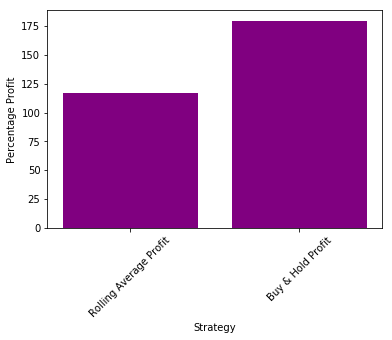

In [21]:
import matplotlib.pyplot as plt

plt.bar([1,2],[percent_profit,percent_change], color = 'purple')
plt.xlabel("Strategy")
plt.xticks([1,2],["Rolling Average Profit", "Buy & Hold Profit"],rotation = 45)
plt.ylabel("Percentage Profit")